In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('../data/train.csv')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

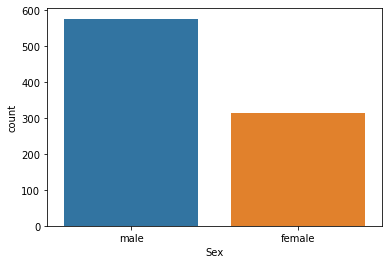

In [13]:
sns.countplot(x="Sex", data=data)

In [24]:
data["Age"].fillna(value=data["Age"].mean(), inplace=True)

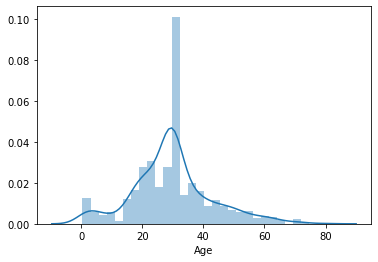

In [25]:
sns.distplot(data["Age"])

In [35]:
def modify_sex(row):
    if row["Sex"] == 'male':
        return 0
    else:
        return 1

data["sex_encoded"] = data["Sex"].apply(modify_sex, axis=1)